# 準備

## デフォルトインポート

In [14]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

In [15]:
from sklearn.datasets import load_boston

boston = load_boston()

In [16]:
# sklearnの変数名の方式に合わせておく(X:説明変数 y:目的変数)
X = boston.data[:, 5] # RMだけをつかう
y = boston.target

(404,) (102,)
(404,) (102,)


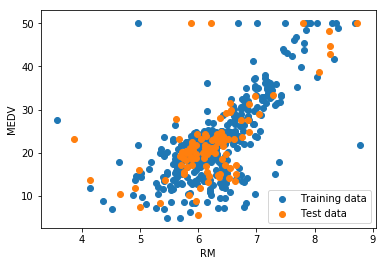

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# TrainingData と TestData を可視化
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

plt.xlabel('RM')
plt.ylabel('MEDV')

plt.legend()

In [18]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

# 学習(=未知パラメータの最適化)
linear_regression.fit(X_train.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# 切片
b = linear_regression.intercept_

# 回帰係数
a = linear_regression.coef_[0]

print(f'MEDV = {a:.2f} RM + {b:.2f}')

MEDV = 9.38 RM + -36.48


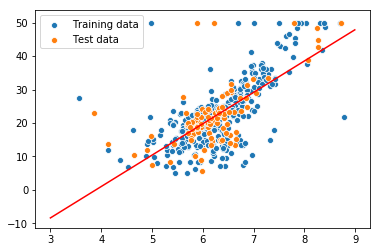

In [22]:
# データの散布図を描画
sns.scatterplot(X_train, y_train, label='Training data')
sns.scatterplot(X_test, y_test, label='Test data')

# 予測の直線を描画
x_line = np.arange(3,9,step=0.01)

# 予測値の計算
y_pred = linear_regression.predict(x_line.reshape(-1, 1))

# 直線の描画
plt.plot(x_line, y_pred, c='r')


In [24]:
# TrainingDataでの R2スコア(決定係数)
r2_score_train = linear_regression.score(X_train.reshape(-1, 1), y_train)
print(f'R^2 Train: {r2_score_train:.3f}')
      
      
# TestDataでの R2スコア(決定係数)
r2_score_test = linear_regression.score(X_test.reshape(-1, 1), y_test)
print(f'R^2 Test: {r2_score_test:.3f}')

R^2 Train: 0.497
R^2 Test: 0.424


このようにサンプルの一部を抜き取って計算してモデルを作成して後ほど残ったデータを使ってモデルを評価する手法を`ホールドアウト`という

## 単回帰、重回帰、多項式回帰

1. 単回帰

$$ y = w_0 + w_1x$$

2. 重回帰

$$ y = w_0 + w_1x_1 + w_2x_2$$

3. 多項式回帰

$$ y = w_0 + w_1x + w_2x^2 ・・・+w_Mx^M$$

これらをまとめて線形回帰(Linear Regression)という。この時の線形は重み×入力の和で表現される`線形結合`で表現できるという事からきている！！(回帰した線が線形というわけではない)

この回帰で言うと下のほうの回帰のほうが、`モデルの表現力が高い`という。また、多項式回帰のMが大きいほどモデルの表現力が高いといえる。ここで、モデルの表現力が高いと訓練誤差を0にできるが、汎化性能は落ちてしまうので、ほどほどが良い。

このようにデータに対応しすぎて汎化性能が失われてしまうことを`過学習(Over fitting)`という。

これに対応するためには、

- データのサンプル数を増やす
- 正則化を行う

事によって過学習に対応する事ができる。